### 1. Generate images with the original model

/home/nessessence/anaconda3/envs/mace/lib/python3.10/site-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

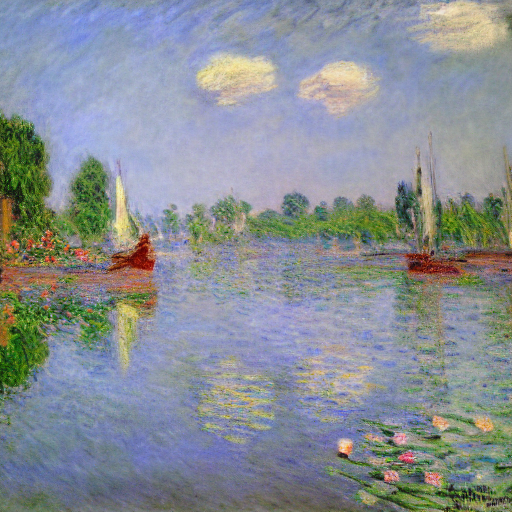

In [ ]:
import torch
from diffusers import StableDiffusionPipeline

model_id = "CompVis/stable-diffusion-v1-4"
device = "cuda"

pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to(device)
pipe.safety_checker = None
pipe.requires_safety_checker = False
torch.Generator(device=device).manual_seed(42)
    
prompt = "a photo of adam-driver"
image = pipe(prompt).images[0]  
    
display(image)

del pipe
torch.cuda.empty_cache()

### 2. Data preparation for finetuning

In [ ]:
import subprocess, os
config_path = "configs/celebrity/erase_cele_5.yaml"
config_path = "configs/celebrity/erase_cele_5.yaml"
cuda_num = 0

subprocess.run(
    ["python", "data_preparation.py", config_path],
    env={"CUDA_VISIBLE_DEVICES": str(cuda_num), **dict(**os.environ)}
)

/home/nessessence/anaconda3/envs/mace/lib/python3.10/site-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
/home/nessessence/anaconda3/envs/mace/lib/python3.10/site-packages/torchvision/transforms/v2/__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please s

Generating training data for concept 1: adam-driver...
Inferencing: a photo of the adam driver


100%|██████████| 30/30 [00:24<00:00,  1.23it/s]


Generating training data for concept 2: adriana-lima...
Inferencing: a photo of the adriana lima


100%|██████████| 30/30 [00:24<00:00,  1.24it/s]


Generating training data for concept 3: amber-heard...
Inferencing: a photo of the amber heard


100%|██████████| 30/30 [00:24<00:00,  1.24it/s]


Generating training data for concept 4: amy-adams...
Inferencing: a photo of the amy adams


100%|██████████| 30/30 [00:24<00:00,  1.24it/s]


Generating training data for concept 5: andrew-garfield...
Inferencing: a photo of the andrew garfield


100%|██████████| 30/30 [00:24<00:00,  1.24it/s]
/home/nessessence/anaconda3/envs/mace/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1682343967769/work/aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/home/nessessence/anaconda3/envs/mace/lib/python3.10/site-packages/transformers/modeling_utils.py:1161: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/home/nessessence/anaconda3/envs/mace/lib/python3.10/site-packages/torch/utils/checkpoint.py:31: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")


final text_encoder_type: bert-base-uncased
_IncompatibleKeys(missing_keys=[], unexpected_keys=['label_enc.weight', 'bert.embeddings.position_ids'])
<All keys matched successfully>
./data/5cele/adriana lima mask/a-photo-of-the-adriana-lima_0_mask.jpg
./data/5cele/adriana lima mask/a-photo-of-the-adriana-lima_7_mask.jpg
./data/5cele/adriana lima mask/a-photo-of-the-adriana-lima_4_mask.jpg
./data/5cele/adriana lima mask/a-photo-of-the-adriana-lima_2_mask.jpg
./data/5cele/adriana lima mask/a-photo-of-the-adriana-lima_6_mask.jpg
./data/5cele/adriana lima mask/a-photo-of-the-adriana-lima_3_mask.jpg
./data/5cele/adriana lima mask/a-photo-of-the-adriana-lima_1_mask.jpg
./data/5cele/adriana lima mask/a-photo-of-the-adriana-lima_5_mask.jpg
./data/5cele/adam driver mask/a-photo-of-the-adam-driver_7_mask.jpg
./data/5cele/adam driver mask/a-photo-of-the-adam-driver_2_mask.jpg
./data/5cele/adam driver mask/a-photo-of-the-adam-driver_5_mask.jpg
./data/5cele/adam driver mask/a-photo-of-the-adam-driver

CompletedProcess(args=['python', 'data_preparation.py', 'configs/celebrity/erase_cele_5.yaml'], returncode=0)

### 3. Finetuning for concept erasure (based on configuration)

In [4]:
import subprocess, os

subprocess.run(
    ["python", "training.py", config_path],
    env={"CUDA_VISIBLE_DEVICES": str(cuda_num), **dict(**os.environ)}
)


/home/nessessence/anaconda3/envs/mace/lib/python3.10/site-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
/home/nessessence/anaconda3/envs/mace/lib/python3.10/site-packages/torchvision/transforms/v2/__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please s

Using relation-focal importance sampling, which can make training more efficient
                  and is particularly beneficial in erasing mass concepts with overlapping terms.


Steps: 100%|██████████| 50/50 [00:16<00:00,  3.10it/s, loss=26.3, lr=0.0001]/home/nessessence/anaconda3/envs/mace/lib/python3.10/site-packages/diffusers/models/attention_processor.py:382: FutureWarning: `set_processor to offload LoRA` is deprecated and will be removed in version 0.26.0. In detail, removing LoRA layers via calling `set_default_attn_processor` is deprecated. Please make sure to call `pipe.unload_lora_weights()` instead.
  deprecate(
05/11/2025 18:04:54 - INFO - src.cfr_lora_training - ***** Running training *****
05/11/2025 18:04:54 - INFO - src.cfr_lora_training -   Num examples = 8
05/11/2025 18:04:54 - INFO - src.cfr_lora_training -   Num batches each epoch = 8
05/11/2025 18:04:54 - INFO - src.cfr_lora_training -   Num Epochs = 7
05/11/2025 18:04:54 - INFO - src.cfr_lora_training -   Instantaneous batch size per device = 1
05/11/2025 18:04:54 - INFO - src.cfr_lora_training -   Total train batch size (w. parallel, distributed & accumulation) = 1
05/11/2025 18:04:54 - I

Concept 0: A drawing capturing the essence of adam driver
True
tensor(46.1570, device='cuda:0', grad_fn=<AddBackward0>)
loss: 46.157047271728516
True
tensor(44.6149, device='cuda:0', grad_fn=<AddBackward0>)
loss: 44.61488342285156
True
tensor(43.9520, device='cuda:0', grad_fn=<AddBackward0>)
loss: 43.95199966430664
True
tensor(36.6268, device='cuda:0', grad_fn=<AddBackward0>)
loss: 36.62684631347656
True
tensor(35.0960, device='cuda:0', grad_fn=<AddBackward0>)
loss: 35.095985412597656
True
tensor(44.4278, device='cuda:0', grad_fn=<AddBackward0>)
loss: 44.42781448364258
True
tensor(22.0796, device='cuda:0', grad_fn=<AddBackward0>)
loss: 22.07961082458496
True
tensor(32.5456, device='cuda:0', grad_fn=<AddBackward0>)
loss: 32.545570373535156
True
tensor(31.7750, device='cuda:0', grad_fn=<AddBackward0>)
loss: 31.774967193603516
True
tensor(32.8940, device='cuda:0', grad_fn=<AddBackward0>)
loss: 32.89399337768555
True
tensor(35.3688, device='cuda:0', grad_fn=<AddBackward0>)
loss: 35.3688163


Steps: 100%|██████████| 50/50 [00:15<00:00,  2.88it/s, loss=11.3, lr=0.0001]05/11/2025 18:05:10 - INFO - src.cfr_lora_training - ***** Running training *****
05/11/2025 18:05:10 - INFO - src.cfr_lora_training -   Num examples = 8
05/11/2025 18:05:10 - INFO - src.cfr_lora_training -   Num batches each epoch = 8
05/11/2025 18:05:10 - INFO - src.cfr_lora_training -   Num Epochs = 7
05/11/2025 18:05:10 - INFO - src.cfr_lora_training -   Instantaneous batch size per device = 1
05/11/2025 18:05:10 - INFO - src.cfr_lora_training -   Total train batch size (w. parallel, distributed & accumulation) = 1
05/11/2025 18:05:10 - INFO - src.cfr_lora_training -   Gradient Accumulation steps = 1
05/11/2025 18:05:10 - INFO - src.cfr_lora_training -   Total optimization steps = 50
Steps:   0%|          | 0/50 [00:00<?, ?it/s]

Concept 1: A drawing capturing the essence of adriana lima
True
tensor(18.0517, device='cuda:0', grad_fn=<AddBackward0>)
loss: 18.051727294921875
True
tensor(22.1527, device='cuda:0', grad_fn=<AddBackward0>)
loss: 22.152664184570312
True
tensor(19.8173, device='cuda:0', grad_fn=<AddBackward0>)
loss: 19.817298889160156
True
tensor(19.2218, device='cuda:0', grad_fn=<AddBackward0>)
loss: 19.221782684326172
True
tensor(19.7101, device='cuda:0', grad_fn=<AddBackward0>)
loss: 19.710100173950195
True
tensor(28.4868, device='cuda:0', grad_fn=<AddBackward0>)
loss: 28.48680305480957
True
tensor(20.8386, device='cuda:0', grad_fn=<AddBackward0>)
loss: 20.838590621948242
True
tensor(24.3895, device='cuda:0', grad_fn=<AddBackward0>)
loss: 24.38945960998535
True
tensor(27.5451, device='cuda:0', grad_fn=<AddBackward0>)
loss: 27.545087814331055
True
tensor(35.4704, device='cuda:0', grad_fn=<AddBackward0>)
loss: 35.470375061035156
True
tensor(16.0761, device='cuda:0', grad_fn=<AddBackward0>)
loss: 16.07

Steps: 100%|██████████| 50/50 [00:15<00:00,  3.08it/s, loss=23.5, lr=0.0001]05/11/2025 18:05:26 - INFO - src.cfr_lora_training - ***** Running training *****
05/11/2025 18:05:26 - INFO - src.cfr_lora_training -   Num examples = 8
05/11/2025 18:05:26 - INFO - src.cfr_lora_training -   Num batches each epoch = 8
05/11/2025 18:05:26 - INFO - src.cfr_lora_training -   Num Epochs = 7
05/11/2025 18:05:26 - INFO - src.cfr_lora_training -   Instantaneous batch size per device = 1
05/11/2025 18:05:26 - INFO - src.cfr_lora_training -   Total train batch size (w. parallel, distributed & accumulation) = 1
05/11/2025 18:05:26 - INFO - src.cfr_lora_training -   Gradient Accumulation steps = 1
05/11/2025 18:05:26 - INFO - src.cfr_lora_training -   Total optimization steps = 50

Steps: 100%|██████████| 50/50 [00:15<00:00,  3.13it/s, loss=23.5, lr=0.0001]

Steps:   0%|          | 0/50 [00:00<?, ?it/s]

Concept 2: amber heard during sunset/sunrise
True
tensor(57.5258, device='cuda:0', grad_fn=<AddBackward0>)
loss: 57.52582550048828
True
tensor(24.6400, device='cuda:0', grad_fn=<AddBackward0>)
loss: 24.63995361328125
True
tensor(66.1616, device='cuda:0', grad_fn=<AddBackward0>)
loss: 66.16161346435547
True
tensor(42.8962, device='cuda:0', grad_fn=<AddBackward0>)
loss: 42.89618682861328
True
tensor(41.5534, device='cuda:0', grad_fn=<AddBackward0>)
loss: 41.55339431762695
True
tensor(43.7385, device='cuda:0', grad_fn=<AddBackward0>)
loss: 43.738529205322266
True
tensor(48.1000, device='cuda:0', grad_fn=<AddBackward0>)
loss: 48.10000991821289
True
tensor(40.4611, device='cuda:0', grad_fn=<AddBackward0>)
loss: 40.4610710144043
True
tensor(46.9288, device='cuda:0', grad_fn=<AddBackward0>)
loss: 46.92877960205078
True
tensor(35.8351, device='cuda:0', grad_fn=<AddBackward0>)
loss: 35.83514404296875
True
tensor(30.8430, device='cuda:0', grad_fn=<AddBackward0>)
loss: 30.84304428100586
True
tens


Steps: 100%|██████████| 50/50 [00:15<00:00,  3.08it/s, loss=16.9, lr=0.0001]05/11/2025 18:05:42 - INFO - src.cfr_lora_training - ***** Running training *****
05/11/2025 18:05:42 - INFO - src.cfr_lora_training -   Num examples = 8
05/11/2025 18:05:42 - INFO - src.cfr_lora_training -   Num batches each epoch = 8
05/11/2025 18:05:42 - INFO - src.cfr_lora_training -   Num Epochs = 7
05/11/2025 18:05:42 - INFO - src.cfr_lora_training -   Instantaneous batch size per device = 1
05/11/2025 18:05:42 - INFO - src.cfr_lora_training -   Total train batch size (w. parallel, distributed & accumulation) = 1
05/11/2025 18:05:42 - INFO - src.cfr_lora_training -   Gradient Accumulation steps = 1
05/11/2025 18:05:42 - INFO - src.cfr_lora_training -   Total optimization steps = 50
Steps:   0%|          | 0/50 [00:00<?, ?it/s]

Concept 3: amy adams in a snapshot
True
tensor(23.0529, device='cuda:0', grad_fn=<AddBackward0>)
loss: 23.05286979675293
True
tensor(36.5767, device='cuda:0', grad_fn=<AddBackward0>)
loss: 36.57673645019531
True
tensor(42.3951, device='cuda:0', grad_fn=<AddBackward0>)
loss: 42.395118713378906
True
tensor(28.2000, device='cuda:0', grad_fn=<AddBackward0>)
loss: 28.1999568939209
True
tensor(23.6688, device='cuda:0', grad_fn=<AddBackward0>)
loss: 23.668825149536133
True
tensor(25.4662, device='cuda:0', grad_fn=<AddBackward0>)
loss: 25.46623420715332
True
tensor(24.5236, device='cuda:0', grad_fn=<AddBackward0>)
loss: 24.523635864257812
True
tensor(24.8398, device='cuda:0', grad_fn=<AddBackward0>)
loss: 24.839820861816406
True
tensor(25.6113, device='cuda:0', grad_fn=<AddBackward0>)
loss: 25.611303329467773
True
tensor(19.3081, device='cuda:0', grad_fn=<AddBackward0>)
loss: 19.30805206298828
True
tensor(25.2282, device='cuda:0', grad_fn=<AddBackward0>)
loss: 25.22818374633789
True
tensor(30.

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Concept 4: A shot of andrew garfield
True
tensor(6.6083, device='cuda:0', grad_fn=<AddBackward0>)
loss: 6.6083269119262695
True
tensor(24.7014, device='cuda:0', grad_fn=<AddBackward0>)
loss: 24.701364517211914
True
tensor(20.5719, device='cuda:0', grad_fn=<AddBackward0>)
loss: 20.57190704345703
True
tensor(29.9175, device='cuda:0', grad_fn=<AddBackward0>)
loss: 29.91748046875
True
tensor(26.0783, device='cuda:0', grad_fn=<AddBackward0>)
loss: 26.078258514404297
True
tensor(26.3253, device='cuda:0', grad_fn=<AddBackward0>)
loss: 26.325347900390625
True
tensor(24.1147, device='cuda:0', grad_fn=<AddBackward0>)
loss: 24.114654541015625
True
tensor(19.2084, device='cuda:0', grad_fn=<AddBackward0>)
loss: 19.208431243896484
True
tensor(5.9461, device='cuda:0', grad_fn=<AddBackward0>)
loss: 5.946061611175537
True
tensor(20.6002, device='cuda:0', grad_fn=<AddBackward0>)
loss: 20.600231170654297
True
tensor(23.7845, device='cuda:0', grad_fn=<AddBackward0>)
loss: 23.784488677978516
True
tensor(22


Loading pipeline components...:  14%|█▍        | 1/7 [00:00<00:03,  1.87it/s]Some weights of the model checkpoint were not used when initializing UNet2DConditionModel: 
 ['down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_k.lora_layer.down.weight, down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_k.lora_layer.up.weight, down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_out.0.lora_layer.down.weight, down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_out.0.lora_layer.up.weight, down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_q.lora_layer.down.weight, down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_q.lora_layer.up.weight, down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_v.lora_layer.down.weight, down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_v.lora_layer.up.weight, down_blocks.0.attentions.0.transformer_blocks.0.attn2.to_k.lora_layer.down.weight, down_blocks.0.attentions.0.transformer_blocks.0.attn2.to_k.lora_layer.up.weight,

============================== Concept 1: adam driver ==============================
============================== Concept 2: adriana lima ==============================
============================== Concept 3: amber heard ==============================
============================== Concept 4: amy adams ==============================
============================== Concept 5: andrew garfield ==============================


100%|██████████| 32/32 [00:03<00:00,  9.90it/s]


CompletedProcess(args=['python', 'training.py', 'configs/celebrity/erase_cele_5.yaml'], returncode=0)

### 4. Sampling with finetuned model

In [5]:
import subprocess
import os

cmd = [
    "python", "inference.py",
    "--num_images", "2",
    "--prompt", "a photo of adam-driver",
    "--model_path", "./saved_model/LoRA_fusion_model",
    "--save_path", "./output"
]

subprocess.run(cmd, env={"CUDA_VISIBLE_DEVICES": str(cuda_num), **os.environ})


/home/nessessence/anaconda3/envs/mace/lib/python3.10/site-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
/home/nessessence/anaconda3/envs/mace/lib/python3.10/site-packages/torchvision/transforms/v2/__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please s

Inference using ./saved_model/LoRA_fusion_model...


100%|██████████| 30/30 [00:06<00:00,  4.35it/s]


CompletedProcess(args=['python', 'inference.py', '--num_images', '2', '--prompt', 'a photo of adam-driver', '--model_path', './saved_model/LoRA_fusion_model', '--save_path', './output'], returncode=0)